In [21]:
%%time
# A2) Code using list of lists
# Taking inputs for n, k and m
n = int(input())
k = int(input())
m = int(input())

arr1 = []
arr2 = []
arr = []
# Taking input of first array
for i in range(n):
    lst = list(map(int, input().split()))
    arr1.append(lst)
# Taking input of second array
for i in range(k):
    lst = list(map(int, input().split()))
    arr2.append(lst)
# Creating an array of zeroes for the resultant
for i in range(n):
    arr.append([0] * m)

# Three nested loops to do the actual multiplications and additions
for i in range(n):
    for j in range(m):
        lst = 0
        for l in range(k):
            lst += arr1[i][l] * arr2[l][j]
        arr[i][j] = lst

# To print the resultant array
for i in range(n):
    for j in range(m):
        print(arr[i][j], end = ' ')
    print()


 3
 3
 4
 1 2 3
 4 5 6
 7 8 9
 1 2 3 4
 3 4 5 6
 5 6 7 8


22 28 34 40 
49 64 79 94 
76 100 124 148 
CPU times: total: 62.5 ms
Wall time: 19.2 s


In [22]:
%%time
# A2) Code using numpy
import numpy as np

# Taking inputs of n, k and m
n = int(input())
k = int(input())
m = int(input())

arr1 = []
arr2 = []
# Taking input of first array
for i in range(n):
    lst = list(map(int, input().split()))
    arr1.append(lst)
# Taking input of second array
for i in range(k):
    lst = list(map(int, input().split()))
    arr2.append(lst)

# Using numpy to get resultant
arr = np.dot(arr1, arr2)

# To print the resultant array
for i in range(n):
    for j in range(m):
        print(arr[i][j], end = ' ')
    print()



 3
 3
 4
 1 2 3
 4 5 6
 7 8 9
 1 2 3 4
 3 4 5 6
 5 6 7 8


22 28 34 40 
49 64 79 94 
76 100 124 148 
CPU times: total: 46.9 ms
Wall time: 13.2 s


In [14]:
%%time
# A3) Inefficient method of finding median
arr = list(map(int, input().split()))
n = len(arr)
# Two different approaches for odd and even
if n%2 == 1:
    # First double loop removes n//2 highest elements leaving the median to be the highest element
    for i in range(n//2):
        maxi =  0
        for j in range(len(arr)):
            if arr[j] >= maxi:
                maxi = arr[j]
        arr.remove(maxi)
    # This loop returns the highest element
    maxi = 0
    for i in range(len(arr)):
        if arr[i] >= maxi:
            maxi = arr[i]
    print(maxi)
# The idea for even is similiar. 
else:
    for i in range(n//2 - 1):
        maxi =  0
        for j in range(len(arr)):
            if arr[j] >= maxi:
                maxi = arr[j]
        arr.remove(maxi)
    max1 = 0
    for i in range(len(arr)):
        if arr[i] >= max1:
            max1 = arr[i]
        arr.remove(max1)
    max2 = 0
    for i in range(len(arr)):
        if arr[i] >= max2:
            max2 = arr[i]
    print((max1 + max2)/2)
        


 1 2 2 3 4 5 6


3
CPU times: total: 31.2 ms
Wall time: 4.95 s


In [13]:
%%time
# A3) Efficient method using sort
arr = list(map(int, input().split()))
# sort array and do the required to get median according evenand odd
arr.sort()
n = len(arr)
if n%2 == 1:
    median = arr[n//2]
    print(median)
else:
    median = arr[n//2 - 1] + arr[n//2]
    print(median)


 1 2 3 4 5


3
CPU times: total: 15.6 ms
Wall time: 2.35 s


In [15]:
%%time
# A3) Numpy method direct function
import numpy as np
arr = list(map(int, input().split()))
median = np.median(arr)
print(median)

 1 2 3 4 5


3.0
CPU times: total: 219 ms
Wall time: 3.46 s


Q4) What is the gradient of the following function with respect to x and y? 
    $$ x^2y + y^3sin(x)$$

A4) The gradient of a function $ f(x, y) = x^2y + y^3sin(x) $ can be calculated by taking Partial Derivatives wrt x and y and finding the final vector. 
$$ \therefore \text{Gradient of}  f(x, y) = \frac{\partial f}{\partial x}\hat{i} +  \frac{\partial f}{\partial y}\hat{j} $$
$$ \frac{\partial f}{\partial x} = 2xy + y^3cos(x)$$
$$ \frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)$$
$$ \therefore \text{Gradient of}  f(x, y) = (2xy + y^3cos(x))\hat{i} + (x^2 + 3y^2sin(x))\hat{j} $$

In [30]:
# A5) Finding gradient using JAX
import math
import jax.numpy as jnp
from jax import grad
import numpy as np
# Define the function 
def f(xy):
    x, y = xy
    return x*x*y + y*y*y*jnp.sin(x)
# Use the direct function ti get grad in JAX
f_grad = grad(f)

x_vals = [0.29, 0.27, 0.38, 0.57, 0.46]
y_vals = [0.75, 0.49, 0.07, 0.65, 0.88]
# Take the 5 values and get the gradient. 
for x, y in zip(x_vals, y_vals):
    xy = jnp.array([x, y])
    jax_gradient = f_grad(xy)
    # Analytical solution is obtained from Q4)
    analytical_gradient =  np.array([2*x*y + y*y*y*math.cos(x), x*x + 3*y*y*math.sin(x)])
    print(f"x = {x}, y = {y}", end = ' ')
    print(f"JAX Gradient: {jax_gradient}", end = ' ')
    print(f"Analytical Gradient: {analytical_gradient}", end = ' ')
    print()

# It can be seen from the result that the JAX and analytical gradients are the same. 

x = 0.29, y = 0.75 JAX Gradient: [0.83925915 0.5666443 ] Analytical Gradient: [0.83925913 0.56664438] 
x = 0.27, y = 0.49 JAX Gradient: [0.3779867 0.2650267] Analytical Gradient: [0.37798668 0.26502665] 
x = 0.38, y = 0.07 JAX Gradient: [0.05351853 0.14985253] Analytical Gradient: [0.05351853 0.14985253] 
x = 0.57, y = 0.65 JAX Gradient: [0.97220695 1.0088835 ] Analytical Gradient: [0.97220706 1.00888362] 
x = 0.46, y = 0.88 JAX Gradient: [1.4202347 1.2429802] Analytical Gradient: [1.42023469 1.24298024] 


In [36]:
# A6) Using sympy to get analytical solution  
import math
import jax.numpy as jnp
from jax import grad
import numpy as np
import sympy as sp
# Sym variables and function are created
x_sym, y_sym = sp.symbols('x y')
f_sym = x_sym**2 * y_sym + y_sym**3 * sp.sin(x_sym)
grad_f_sym = [sp.diff(f_sym, x_sym), sp.diff(f_sym, y_sym)]

x_vals = [0.29, 0.27, 0.38, 0.57, 0.46]
y_vals = [0.75, 0.49, 0.07, 0.65, 0.88]
# Take the 5 values and get the gradient. 
for x, y in zip(x_vals, y_vals):
    sympy_gradient = [grad_f.evalf(subs={x_sym: x, y_sym: y}) for grad_f in grad_f_sym]
    # Analytical solution is obtained from Q4)
    analytical_gradient =  np.array([2*x*y + y*y*y*math.cos(x), x*x + 3*y*y*math.sin(x)])
    print(f"x = {x}, y = {y}", end = ' ')
    print(f"Sympy Gradient: {sympy_gradient}", end = ' ')
    print(f"Analytical Gradient: {analytical_gradient}", end = ' ')
    print()

# It can be seen from the result that the sympy and analytical gradients are the same. 

x = 0.29, y = 0.75 Sympy Gradient: [0.839259134981919, 0.566644379864410] Analytical Gradient: [0.83925913 0.56664438] 
x = 0.27, y = 0.49 Sympy Gradient: [0.377986682186551, 0.265026653846965] Analytical Gradient: [0.37798668 0.26502665] 
x = 0.38, y = 0.07 Sympy Gradient: [0.0535185319700027, 0.149852530900371] Analytical Gradient: [0.05351853 0.14985253] 
x = 0.57, y = 0.65 Sympy Gradient: [0.972207055303938, 1.00888362177031] Analytical Gradient: [0.97220706 1.00888362] 
x = 0.46, y = 0.88 Sympy Gradient: [1.42023468759371, 1.24298024210230] Analytical Gradient: [1.42023469 1.24298024] 


In [ ]:
#A7) The dictionary contains student records from 3 years 2022, 2023, 2024. Each with 3 branches with 2 students in each branch. 
students_records = {
    2022: {
        'Computer Science': {
            1: {
                'Roll Number': 1,
                'Name': 'Arnav Deshpande',
                'Marks': {
                    'DSA': 85,
                    'DM': 69,
                    'Calculus': 83
                }
            },
            2: {
                'Roll Number': 2,
                'Name': 'Arnav Bhalerao',
                'Marks': {
                    'DSA': 86,
                    'DM': 66,
                    'Calculus': 75
                }
            }
        },
        'Artificial Intelligence': {
            3: {
                'Roll Number': 3,
                'Name': 'Ayush Patil',
                'Marks': {
                    'SSRP': 95,
                    'ML': 65,
                    'PDE': 78
                }
            },
            4: {
                'Roll Number': 4,
                'Name': 'Bhavesh Phundkar',
                'Marks': {
                    'SSRP': 88,
                    'ML': 77,
                    'PDE': 82
                }
            }
        },
        'Mechanical Engineering':{
            5: {
                'Roll Number': 5,
                'Name': 'Gargi Joshi', 
                'Marks': {
                    'SnD': 88,
                    'MoS': 89, 
                    'PDE': 66
                }   
            },
            6:{
                'Roll Number': 6,
                'Name': 'Mahi Shitut', 
                'Marks': {
                    'SnD': 84,
                    'MoS': 86, 
                    'PDE': 77
                }   
            },
        }
    },
    2023: {
        'Computer Science': {
            7: {
                'Roll Number': 1,
                'Name': 'Arnav Zhodge',
                'Marks': {
                    'DSA': 84,
                    'DM': 68,
                    'Calculus': 82
                }
            },
            8: {
                'Roll Number': 2,
                'Name': 'Arnav Ketkar',
                'Marks': {
                    'DSA': 85,
                    'DM': 65,
                    'Calculus': 74
                }
            }
        }
    },
    2024: {
        'Computer Science': {
            13: {
                'Roll Number': 1,
                'Name': 'Arnav Gogate',
                'Marks': {
                    'DSA': 86,
                    'DM': 70,
                    'Calculus': 84
                }
            },
            14: {
                'Roll Number': 2,
                'Name': 'Arnav Jagtap',
                'Marks': {
                    'DSA': 87,
                    'DM': 67,
                    'Calculus': 76
                }
            }
        }
    }
}

In [ ]:
# A8)
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.name}, Students: {self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {self.years})"

# Creating database for year 2022
year_2022 = Year(2022)
branch_1_2022 = Branch('Computer Science')
branch_1_2022.add_student(Student(1, 'Arnav Deshoande', {'DSA': 85, 'DM': 69, 'Calculus': 83}))
branch_1_2022.add_student(Student(2, 'Arnav Bhalerao', {'DSA': 86, 'DM': 66, 'Calculus': 75}))

branch_2_2022 = Branch('Artificual Intelligence')
branch_2_2022.add_student(Student(3, 'Ayush Patil', {'SSRP': 95, 'ML': 65, 'PDE': 78}))
branch_2_2022.add_student(Student(4, 'Bhavesh Phundkar', {'SSRP': 88, 'ML': 77, 'PDE': 82}))

branch_3_2022 = Branch('Mechanical Engineering')
branch_3_2022.add_student(Student(5, 'Gargi Joshi', {'SnD': 88, 'MoS': 89, 'PDE': 66}))
branch_3_2022.add_student(Student(6, 'Mahi Shitut', {'SnD': 84, 'MoS': 86, 'PDE': 77}))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)
year_2022.add_branch(branch_3_2022)

database.add_year(year_2022)

# Creating database for year 2023
year_2023 = Year(2023)
branch_1_2023 = Branch('Computer Science')
branch_1_2023.add_student(Student(1, 'Arnav Zhodge', {'DSA': 84, 'DM': 68, 'Calculus': 82}))
branch_1_2023.add_student(Student(2, 'Arnav Ketkar', {'DSA': 85, 'DM': 65, 'Calculus': 74}))

year_2023.add_branch(branch_1_2023)

database.add_year(year_2023)

# Creating database for year 2024
year_2024 = Year(2024)
branch_1_2024 = Branch('Computer Science')
branch_1_2024.add_student(Student(1, 'Arnav Gogate', {'DSA': 86, 'DM': 70, 'Calculus': 84}))
branch_1_2024.add_student(Student(2, 'Arnav Jagtap', {'DSA': 87, 'DM': 67, 'Calculus': 76}))

year_2024.add_branch(branch_1_2024)

database.add_year(year_2024)

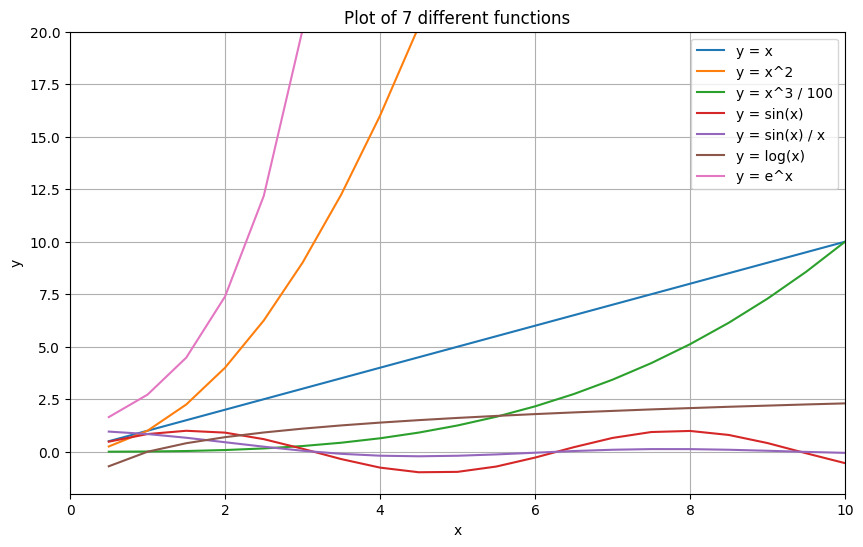

In [46]:
# A9)
import math
import numpy as np
import matplotlib.pyplot as plt
# Declaring the gaps betweens points and the seven functionc
x = np.arange(0.5, 100.0, 0.5)
y1 = x
y2 = x**2
y3 = x**3/100
y4 = np.sin(x)
y5 = (np.sin(x))/x
y6 = np.log(x)
y7 = np.exp(x)
# Plotting all the figures
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x^2')
plt.plot(x, y3, label='y = x^3 / 100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x) / x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x, y7, label='y = e^x')
plt.title('Plot of 7 different functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid(True)
# Marking x and y axis limits
plt.xlim(0, 10)
plt.ylim(-2, 20)
plt.show()

In [59]:
# A10) 
import numpy as np 
import pandas as pd
# Creating random matrix
matrix = np.random.uniform(1, 2, size = (20, 5))
# Declaring matrix as dataframe
df = pd.DataFrame(matrix)
# Giving the columns names
df.columns = ['a', 'b', 'c', 'd', 'e']
# Making a column containing all standard deviations of all columns and find id of max
dev = df.std()
max_col = dev.idxmax()
print(f"Column with max standard deviation is column {max_col}")
# Making a column having mean of all rows and find the max
means = df.mean(axis=1)
min_row = means.idxmin()
print(f"Column with min mean is row {min_row}")

Column with max standard deviation is column d
Column with min mean is row 17


In [63]:
# A11)
# Creating a new column f which has sum of the first 5 columns
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis = 1)
# Creating a column ehich contains whether value in f greater or less than 8
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
# Finding number of rows with mean less than 8
total_LT8 = (df['g'] == 'LT8').sum()
# Finding the standard deviation of rows with mean less than 8 and greater than 8
std_LT8 = df[df['g'] == 'LT8']['f'].std()
std_GT8 = df[df['g'] == 'GT8']['f'].std()

print(f"The number of rows in the dataframe where the value in the column g is LT8 is {total_LT8}")
print(f"The standard deviation in column f for the rows where the value in the column g is LT8 is {std_LT8}")
print(f"The standard deviation in column f for the rows where the value in the column g is GT8 is {std_GT8}")



The number of rows in the dataframe where the value in the column g is LT8 is 17
The standard deviation in column f for the rows where the value in the column g is LT8 is 0.4231527796727387
The standard deviation in column f for the rows where the value in the column g is GT8 is 0.348529057900338


In [65]:
#A12) Broadcasting is the process which numpy does to perform arithmetic operations on arrays of different sizes. The smaller array is 'stretched' 
# across the larger array so that the arithmetic opertaion becomes compatible. 
# For example, 
a = np.array([[1,2,3,4], [5,6,7,8]])
b = np.array([1,3,5,7])
b2 = [[1,3,5,7], [1,3,5,7]]
sum = a + b
sum2 = a + b2
print(sum)
print(sum2)
# By looking at the sum we can tell that the row b was added individually to both rows of a and b. 
# Effectively, numpy converts the array b into the array b = [[1,3,5,7], [1,3,5,7]] and then the addition operation becomes compatible and we get the result.
# We can clearly see this as a + b2 is also equal to the same result. 

[[ 2  5  8 11]
 [ 6  9 12 15]]
[[ 2  5  8 11]
 [ 6  9 12 15]]


In [70]:
# A13) 
# Creating an numpy array
arr = np.array([-1,1,-2,3,4,5,5,-6])
# Go linearly through the array and note the min and the min index of the array and return min index after traversing through the whole array
def argmin(array):
    min = array[0]
    min_index = 0
    for i in range(len(array)):
        if array[i] < min:
            min = array[i]
            min_index = i

    return min_index

print(argmin(arr))
result = np.argmin(arr)
print(result)

7
7
